In [1]:
import numpy as np 

import pandas as pd 
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
df=pd.read_csv("/content/drive/MyDrive/csv/gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Text(0.5, 1.12, 'Feature Corelation using Heatmap ')

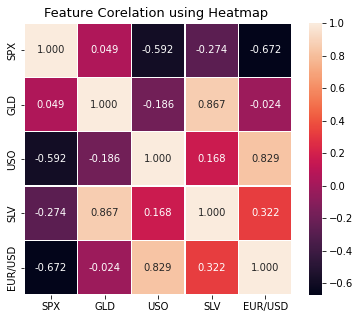

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2)
plt.title('Feature Corelation using Heatmap ', y = 1.12, size=13, loc="center")

In [5]:
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



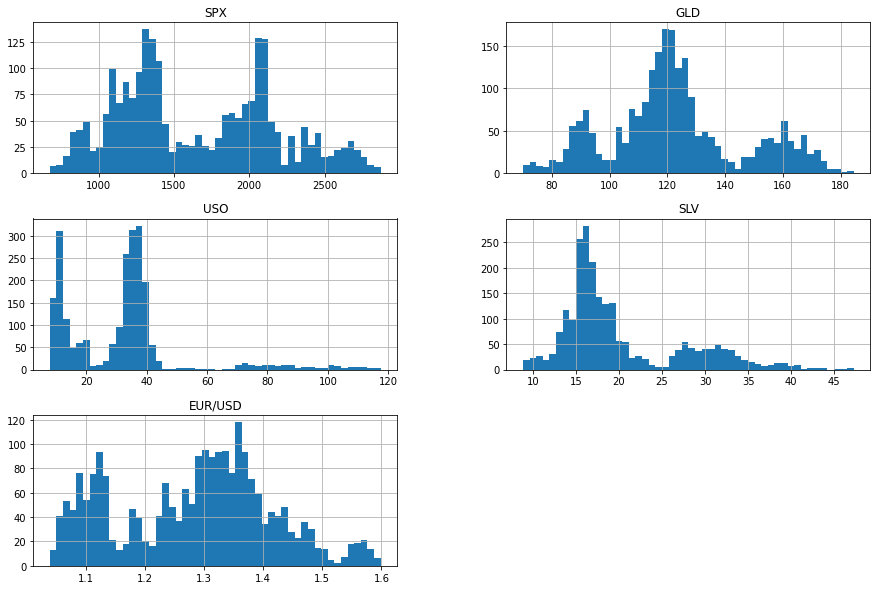

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))
plt.show()

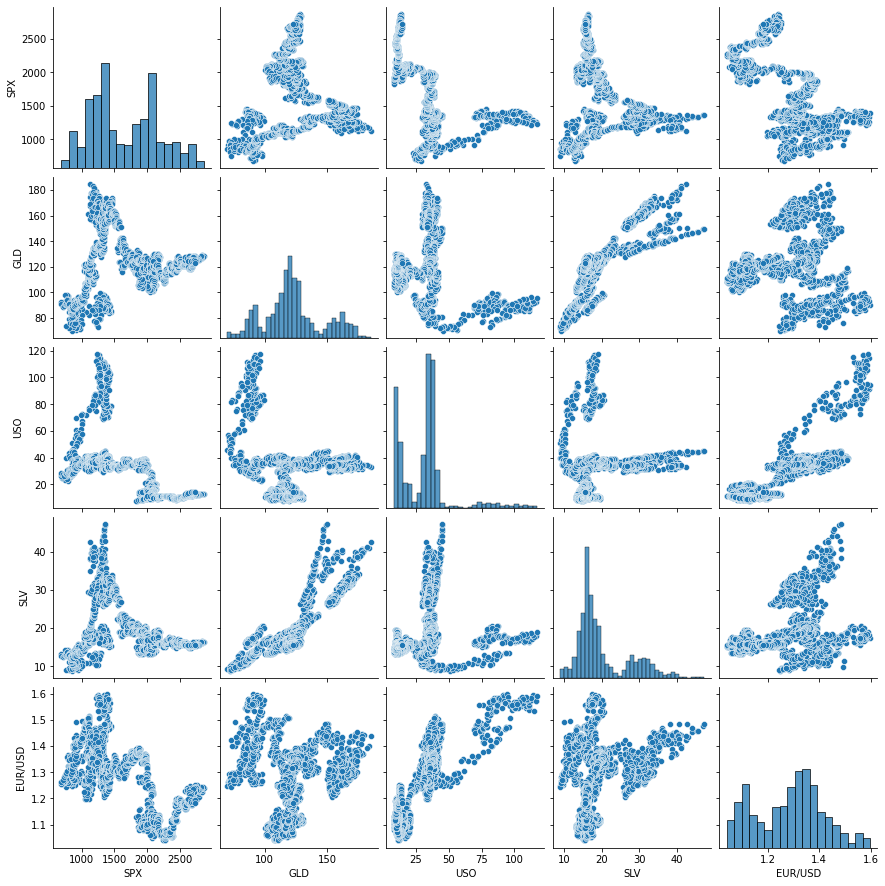

In [7]:
sns.pairplot(df.loc[:,df.dtypes == 'float64'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 0.33413834726925085
Kurtosis: -0.275081


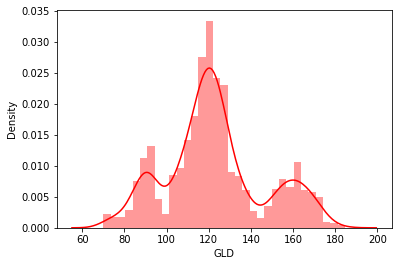

In [8]:
sns.distplot(df['GLD'], color = 'red')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

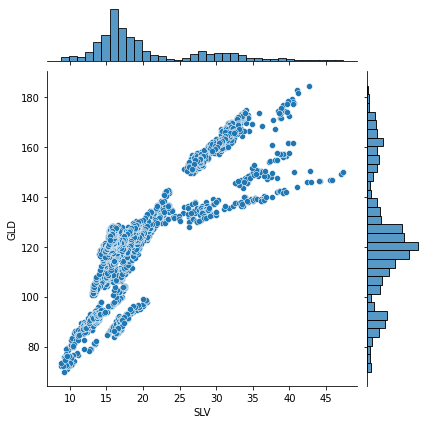

In [9]:
sns.jointplot(x =df['SLV'], y = df['GLD'])

In [10]:
df["new1"]=df["SLV"]*5
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,new1
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,75.900
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,76.425
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,75.835
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,75.265
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,77.950


In [11]:
df1=df.copy()
temp = df1[['SPX','USO','SLV','EUR/USD','new1']]
x = temp.iloc[:, :].values
y = df1.iloc[:, 2].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [13]:
y_pred = regressor.predict(x_test)

In [14]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

Training Accuracy:  0.9984340783384931
Testing Accuracy:  0.9898570361228797


In [15]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.3028743574672486
MSE :   5.218041419378834
RMAE :   2.2843032678212483


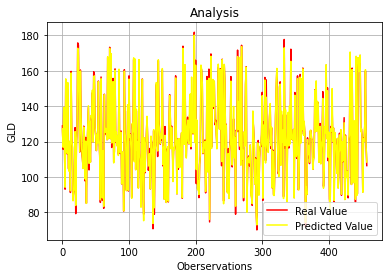

In [16]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'red', label = 'Real Value')
plt.plot(y_pred, color = 'yellow', label = 'Predicted Value')
plt.grid(2.5)
plt.title('Analysis')
plt.xlabel('Oberservations')
plt.ylabel('GLD')
plt.legend()
plt.show()

## **Name : Akshat Mehra, Ansh Sood**